# import statements

In [21]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, RepeatedKFold
import sklearn.metrics
from sklearn.metrics import accuracy_score, r2_score,explained_variance_score
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import ExtraTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRFRegressor, XGBRegressor

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import statsmodels.api as sm
import time
import statistics
# using pipeline
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

from statsmodels.stats.outliers_influence import variance_inflation_factor

# load data and clean and split

In [2]:
df = pd.read_csv('../Data/ProcessedCsvs/merged.csv')

In [3]:
#df['Unnamed: 0'].head(30)
# renaming the column "A"
df.rename(columns = {"'Unnamed: 0'": "RowId"}, 
          inplace = True)

#df.isnull().sum()
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

#print(df[df["5 to 14 hours"].isnull()][null_columns])
# drop all rows with any NaN and NaT values
df_clean = df.dropna()
print(len(df_clean))

2220


In [4]:
df_clean.columns.to_list()

['Unnamed: 0',
 'SA2',
 'Employed, worked full-time',
 'Employed, worked part-time',
 'Employed, away from work',
 'Unemployed, looking for full-time work',
 'Unemployed, looking for part-time work',
 'Not in the labour force',
 'Not stated',
 'Total',
 'Nil distance',
 'Over 0 km to less than 2.5 km',
 '2.5 km to less than 10 km',
 '10 km to less than 30 km',
 '30 km to less than 50 km',
 '50 km to less than 250 km',
 '250 km and over',
 'Participant in the Community Development Programme',
 'Not a participant in the Community Development Programme',
 'Oceania and Antarctica',
 'North-West Europe',
 'Southern and Eastern Europe',
 'North Africa and the Middle East',
 'South-East Asia',
 'North-East Asia',
 'Southern and Central Asia',
 'Americas',
 'Sub-Saharan Africa',
 'Supplementary codes',
 'Did not provide child care',
 'Cared for own child/children',
 'Cared for other child/children',
 'Cared for own child/children and other child/children',
 'Has need for assistance with core a

In [10]:
#df_clean.iloc[:10, 10:]

,Nil distance,Over 0 km to less than 2.5 km,2.5 km to less than 10 km,10 km to less than 30 km,30 km to less than 50 km,50 km to less than 250 km,250 km and over,Participant in the Community Development Programme,Not a participant in the Community Development Programme,Oceania and Antarctica,...,State/Territory Government,Local Government,Private sector,Nil hours,Less than 5 hours,5 to 14 hours,15 to 29 hours,30 hours or more,Not a volunteer,Volunteer
0,8.22,13.00,2.92,7.96,1.06,28.65,2.12,0.0,0.0,81.17,...,8.75,0.80,45.36,6.37,12.47,30.24,20.95,20.69,56.50,33.95
1,2.26,7.14,18.43,45.98,0.81,0.27,0.00,0.0,0.0,80.13,...,9.30,0.63,43.36,11.83,15.09,32.70,17.34,16.62,76.69,17.07
2,1.73,13.75,14.93,40.75,0.38,0.22,0.49,0.0,0.0,64.64,...,8.03,0.16,44.42,12.02,19.25,35.20,12.18,11.54,72.18,18.27
3,1.43,11.33,16.15,43.49,0.65,0.52,0.52,0.0,0.0,66.02,...,8.46,0.00,44.79,11.07,21.09,32.55,13.93,13.54,74.61,17.97
4,4.45,2.43,2.76,31.51,28.42,6.98,0.94,0.0,0.0,79.68,...,11.33,0.23,40.96,4.26,11.61,37.31,20.65,16.76,65.68,24.95
5,3.15,2.42,12.81,59.61,0.84,0.00,1.18,0.0,0.0,82.13,...,10.51,0.45,40.79,5.84,14.44,37.98,20.84,16.69,71.69,24.33
6,0.00,31.05,9.13,10.96,5.94,9.13,1.37,0.0,0.0,83.56,...,11.87,5.02,54.79,7.76,8.68,33.33,21.00,26.48,59.82,36.07
7,2.78,35.56,22.50,0.00,0.69,4.72,0.00,0.0,0.0,84.44,...,13.06,1.67,50.97,6.25,11.39,37.08,19.31,18.75,68.33,24.17
8,7.99,1.74,11.81,18.40,11.11,20.49,2.08,0.0,0.0,81.60,...,9.03,2.43,53.12,3.12,9.72,36.81,18.40,22.92,51.74,37.50
9,7.93,16.52,11.96,13.37,17.83,8.48,3.80,0.0,0.0,77.39,...,7.83,2.72,69.13,6.41,19.67,32.50,17.17,13.59,63.91,26.63


In [11]:
# define x and y

y = df_clean['Unemployed, looking for full-time work'].values

# df_clean = df_clean.drop(columns=['Unnamed: 0','SA2','Employed, worked full-time',
#        'Employed, worked part-time', 'Employed, away from work',
#        'Unemployed, looking for full-time work',
#        'Unemployed, looking for part-time work', 'Not in the labour force',
#        'Not stated', 'Total'], axis=1)

#X_all = df_clean

X_all = df_clean.iloc[:, 10:]

In [12]:

Xall_train, Xall_test, y_train, y_test = train_test_split(X_all, y ,test_size = 0.25, random_state=42)

Xall_train.shape, Xall_test.shape, y_train.shape, y_test.shape

((1665, 100), (555, 100), (1665,), (555,))

# run basic OLS model with all the features

In [29]:

Xols_all = sm.add_constant(X_all)
est_allfeatures = sm.OLS(y,Xols_all).fit()
est_allfeatures.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     39.13
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:36:52   Log-Likelihood:                -2707.6
No. Observations:                2220   AIC:                             5617.
Df Residuals:                    2119   BIC:                             6193.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        0.1175      0.588      0.200      0.842      -1.036       1.271
Nil distance                                                -0.0369      0.012     -3.083      0.002      -0.060      -0.013
Over 0 km to less than 2.5 km                               -0.0268      0.006     -4.589      0.000      -0.038      -0.015
2.5 km to less than 10 km                                   -0.0135      0.005     -2.462      0.014      -0.024      -0.003
10 km to less than 30 km                                    -0.0133      0.005     -2.413      0.016      -0.024      -0.002
30 km to less than 50 km                                    -0.0195      0.006     -3.060      0.002      -0.032      -0.007
50 km to less than 250 km                                   -0.0337      0.008     -4.445      0.000      -0.049      -0.019
250 km and over                                             -0.0538      0.015     -3.477      0.001      -0.084      -0.023
Participant in the Community Development Programme          -0.0117      0.045     -0.260      0.795      -0.100       0.076
Not a participant in the Community Development Programme     0.0757      0.021      3.523      0.000       0.034       0.118
Oceania and Antarctica                                      -0.0075      0.005     -1.489      0.137      -0.017       0.002
North-West Europe                                           -0.0047      0.010     -0.461      0.645      -0.025       0.015
Southern and Eastern Europe                                 -0.0195      0.023     -0.845      0.398      -0.065       0.026
North Africa and the Middle East                            -0.0857      0.012     -6.900      0.000      -0.110      -0.061
South-East Asia                                             -0.0193      0.009     -2.233      0.026      -0.036      -0.002
North-East Asia                                              0.0047      0.008      0.555      0.579      -0.012       0.021
Southern and Central Asia                                    0.0103      0.008      1.226      0.220      -0.006       0.027
Americas                                                    -0.0065      0.019     -0.351      0.726      -0.043       0.030
Sub-Saharan Africa                                           0.0187      0.019      0.995      0.320      -0.018       0.056
Supplementary codes                                          0.1226      0.189      0.648      0.517      -0.248       0.494
Did not provide child care                                   0.0325      0.007      4.847      0.000       0.019       0.046
Cared for own child/children                                 0.0129      0.008     

# remove insigficant features and run the OLS model

In [ ]:
#high pvalues
highpvalue_columns = ['Participant in the Community Development Programme','Transport, Postal and Warehousing','Manufacturing',
                'North-West Europe','North-East Asia','Americas','Cared for other child/children',
               'Graduate Diploma and Graduate Certificate Level','Electricity, Gas, Water and Waste Services','Mining',
                     'Rental, Hiring and Real Estate Services','Professional, Scientific and Technical Services',
                      'Sub-Saharan Africa','Supplementary codes','Supplementary Codes','Cared for own child/children and other child/children'
                     ,'Public Administration and Safety','Machinery Operators and Drivers']

X_lowp = X_all.drop(columns=highpvalue_columns, axis=1)

In [ ]:
X_lowp = sm.add_constant(X_lowp)
est_lowp = sm.OLS(y, X_lowp).fit()
est_lowp.summary()

# compare all the models with all features

In [ ]:


seed = 7
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('XGR', XGBRegressor(n_estimators=100,learning_rate=0.1, gamma=10)))
models.append(('XGRF', XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)))
models.append(('KNNR', KNeighborsRegressor()))
models.append(('ETR', ExtraTreeRegressor()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    start_time = time.time()
    model.fit(Xall_train, y_train)
    
    y_pred_all = model.predict(Xall_test)
    predictions = [round(value) for value in y_pred_all]
    
    #evaluate the predictons
    accuracy = r2_score(y_test, predictions)
    print("Accuracy: %0.2f%%"%(accuracy * 100.0), name)
    print("----%s seconds ---"%(time.time() - start_time))
    
    # define the model evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the scores
    n_scores = cross_val_score(model, X_all, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
     # report performance
    print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
    
#     kfold = model_selection.KFold(n_splits=5)
#     cv_results = model_selection.cross_val_score(model, X, y, cv=kfold)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
#boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

# Hyper parameter tuning for XGBoost with RandomSearchCv

In [ ]:
# parameter tuning

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.30],
    "max_depth":[2,4,5,6,7,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gammma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.6]
}

xgb_all = XGBRegressor()

random_search_all = RandomizedSearchCV(xgb_all, param_distributions=params, n_iter=5,scoring='neg_mean_absolute_error'
                                  ,n_jobs=-1, cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_all.fit(Xall_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

In [ ]:
random_search_all.best_estimator_

In [ ]:
random_search_all.best_params_

In [ ]:
xgb_all_best = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gammma=0.1,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=7, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
n_scores_all = cross_val_score(xgb_all_best, X_all, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

In [ ]:
n_scores_all.mean()

# Feature Selection 

# Linear Regression with selected features

In [ ]:


lr_40 = Pipeline([
  ('feature_selection', SelectKBest(score_func = f_regression, k=40)),
  ('lr', LinearRegression())
])
lr_40.fit(Xall_train, y_train)

In [ ]:
lr_40.score(Xall_test, y_test)

# XGRegressor with selected features

In [ ]:
xgb_40 = Pipeline([
  ('feature_selection', SelectKBest(score_func = f_regression, k=40)),
  ('xgb', XGBRegressor())
])
xgb_40.fit(Xall_train, y_train)

In [ ]:
xgb_40.score(Xall_test, y_test)

In [ ]:
y_pred_xgb_40 = xgb_40.predict(Xall_test)
# y_pred_clf = clf.predict()

mse_xgb_40 = mean_squared_error(y_test, y_pred_xgb_40)
rmse_xgb_40 = mean_squared_error(y_test, y_pred_xgb_40, squared=False)
mse_xgb_40, rmse_xgb_40

# mutual information based feature selection

In [ ]:

# determine the mutual information
mutual_info = mutual_info_regression(Xall_train.fillna(0), y_train)
#mutual_info

In [ ]:

mutual_info = pd.Series(mutual_info)
mutual_info.index = Xall_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info[:40].sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
selected_top_columns_all = SelectPercentile(mutual_info_regression, percentile=30)
selected_top_columns_all.fit(Xall_train.fillna(0), y_train)

In [ ]:
Xall_train.columns[selected_top_columns_all.get_support()]

In [ ]:
Xtrain_mf20 = Xall_train[['Nil distance', 'Graduate Diploma and Graduate Certificate Level',
       'Bachelor Degree Level', 'Secondary Education - Years 9 and below',
       'Partially engaged', 'Not Engaged', 'Education and Training',
       'Managers', 'Professionals', 'Labourers', '$150-$299 ($7,800-$15,599)',
       '$300-$399 ($15,600-$20,799)', '$1,000-$1,249 ($52,000-$64,999)',
       '$1,250-$1,499 ($65,000-$77,999)', '$1,500-$1,749 ($78,000-$90,999)',
       '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Separated', 'Private sector',
       'Volunteer']]
Xtest_mf20 = Xall_test[['Nil distance', 'Graduate Diploma and Graduate Certificate Level',
       'Bachelor Degree Level', 'Secondary Education - Years 9 and below',
       'Partially engaged', 'Not Engaged', 'Education and Training',
       'Managers', 'Professionals', 'Labourers', '$150-$299 ($7,800-$15,599)',
       '$300-$399 ($15,600-$20,799)', '$1,000-$1,249 ($52,000-$64,999)',
       '$1,250-$1,499 ($65,000-$77,999)', '$1,500-$1,749 ($78,000-$90,999)',
       '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Separated', 'Private sector',
       'Volunteer']]

Xtrain_mf30 = Xall_train[['Nil distance', 'Graduate Diploma and Graduate Certificate Level',
       'Bachelor Degree Level', 'Secondary Education - Years 9 and below',
       'Supplementary Codes', 'Fully engaged', 'Partially engaged',
       'At least partially engaged', 'Not Engaged',
       'Professional, Scientific and Technical Services',
       'Public Administration and Safety', 'Education and Training',
       'Health Care and Social Assistance', 'Managers', 'Professionals',
       'Clerical and Administrative Workers', 'Labourers',
       '$150-$299 ($7,800-$15,599)', '$300-$399 ($15,600-$20,799)',
       '$1,000-$1,249 ($52,000-$64,999)', '$1,250-$1,499 ($65,000-$77,999)',
       '$1,500-$1,749 ($78,000-$90,999)', '$1,750-$1,999 ($91,000-$103,999)',
       '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Separated',
       'State/Territory Government', 'Private sector', '5 to 14 hours',
       'Volunteer']]

Xtest_mf30 = Xall_test[['Nil distance', 'Graduate Diploma and Graduate Certificate Level',
       'Bachelor Degree Level', 'Secondary Education - Years 9 and below',
       'Supplementary Codes', 'Fully engaged', 'Partially engaged',
       'At least partially engaged', 'Not Engaged',
       'Professional, Scientific and Technical Services',
       'Public Administration and Safety', 'Education and Training',
       'Health Care and Social Assistance', 'Managers', 'Professionals',
       'Clerical and Administrative Workers', 'Labourers',
       '$150-$299 ($7,800-$15,599)', '$300-$399 ($15,600-$20,799)',
       '$1,000-$1,249 ($52,000-$64,999)', '$1,250-$1,499 ($65,000-$77,999)',
       '$1,500-$1,749 ($78,000-$90,999)', '$1,750-$1,999 ($91,000-$103,999)',
       '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Separated',
       'State/Territory Government', 'Private sector', '5 to 14 hours',
       'Volunteer']]

In [ ]:
Xtrain_17 = Xall_train[['Nil distance', 
       'Bachelor Degree Level', 'Secondary Education - Years 9 and below',
       'Partially engaged', 'Not Engaged', 
       'Managers', 'Labourers', '$150-$299 ($7,800-$15,599)',
       '$300-$399 ($15,600-$20,799)', '$1,000-$1,249 ($52,000-$64,999)',
       '$1,250-$1,499 ($65,000-$77,999)', '$1,500-$1,749 ($78,000-$90,999)',
       '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Separated', 'Private sector',
       'Volunteer']]

Xtest_17 = Xall_train[['Nil distance', 
       'Bachelor Degree Level', 'Secondary Education - Years 9 and below',
       'Partially engaged', 'Not Engaged', 
       'Managers', 'Labourers', '$150-$299 ($7,800-$15,599)',
       '$300-$399 ($15,600-$20,799)', '$1,000-$1,249 ($52,000-$64,999)',
       '$1,250-$1,499 ($65,000-$77,999)', '$1,500-$1,749 ($78,000-$90,999)',
       '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Separated', 'Private sector',
       'Volunteer']]

In [ ]:
X_17 = X_all[['Nil distance', 
       'Bachelor Degree Level', 'Secondary Education - Years 9 and below',
       'Partially engaged', 'Not Engaged', 
       'Managers', 'Labourers', '$150-$299 ($7,800-$15,599)',
       '$300-$399 ($15,600-$20,799)', '$1,000-$1,249 ($52,000-$64,999)',
       '$1,250-$1,499 ($65,000-$77,999)', '$1,500-$1,749 ($78,000-$90,999)',
       '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Separated', 'Private sector',
       'Volunteer']]

X_30 = X_all[['Nil distance', 'Graduate Diploma and Graduate Certificate Level',
       'Bachelor Degree Level', 'Secondary Education - Years 9 and below',
       'Supplementary Codes', 'Fully engaged', 'Partially engaged',
       'At least partially engaged', 'Not Engaged',
       'Professional, Scientific and Technical Services',
       'Public Administration and Safety', 'Education and Training',
       'Health Care and Social Assistance', 'Managers', 'Professionals',
       'Clerical and Administrative Workers', 'Labourers',
       '$150-$299 ($7,800-$15,599)', '$300-$399 ($15,600-$20,799)',
       '$1,000-$1,249 ($52,000-$64,999)', '$1,250-$1,499 ($65,000-$77,999)',
       '$1,500-$1,749 ($78,000-$90,999)', '$1,750-$1,999 ($91,000-$103,999)',
       '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Separated',
       'State/Territory Government', 'Private sector', '5 to 14 hours',
       'Volunteer']]


# VIF score

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_all.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_all.values, i)
                          for i in range(len(X_all.columns))]
  
print(vif_data)


In [ ]:
vif_data.VIF.sort_values(ascending=True)

In [ ]:
len(vif_data[vif_data.VIF < 10])

In [ ]:
vif_data[vif_data.VIF < 10].feature.values

In [ ]:
X_low_vif = X_all[['30 km to less than 50 km', '50 km to less than 250 km',
       '250 km and over',
       'Participant in the Community Development Programme',
       'Not a participant in the Community Development Programme',
       'North-West Europe', 'Southern and Eastern Europe',
       'North Africa and the Middle East', 'Americas',
       'Sub-Saharan Africa', 'Supplementary codes',
       'Certificate I & II Level', 'Agriculture, Forestry and Fishing',
       'Mining', 'Manufacturing',
       'Electricity, Gas, Water and Waste Services', 'Construction',
       'Wholesale Trade', 'Transport, Postal and Warehousing',
       'Information Media and Telecommunications',
       'Rental, Hiring and Real Estate Services',
       'Arts and Recreation Services', 'Machinery Operators and Drivers',
       'Negative income', '$1-$149 ($1-$7,799)',
       '$3,000 or more ($156,000 or more)', 'Not at all', 'Widowed',
       'Divorced', 'Local Government']]

In [ ]:
X_low_vif.shape

In [ ]:
X_lowvif = vif_data[vif_data.VIF < 10].feature

In [ ]:
X_lowvif

In [ ]:
X_all.shape

# OLS with high mutual info score

In [ ]:
X_17 = sm.add_constant(X_17)
est_mf_17 = sm.OLS(y,X_17).fit()
est_mf_17.summary()

In [ ]:
#with 30 percentile from mututal info()

X_30 = sm.add_constant(X_30)
est_mf_30 = sm.OLS(y,X_30).fit()
est_mf_30.summary()

In [ ]:
est_mf_30.pvalues[:20].sort_values(ascending=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=imp_features_rf, y=imp_features_rf.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Random Forest Q1")
plt.grid(False)
plt.show()

# OLS with less VIF score

In [ ]:
X_low_vif = sm.add_constant(X_low_vif)
est_low_vif = sm.OLS(y,X_low_vif).fit()
est_low_vif.summary()

# ExtraTreesRegressor 

In [ ]:
etr_ft = ExtraTreeRegressor(max_depth=8, min_samples_leaf=5, max_leaf_nodes=10)
etr_ft.fit(Xtrain_mf30, y_train)


In [ ]:
len(Xtrain_mf30.columns)

In [ ]:
etr_ft.score(Xtest_mf30, y_test)

In [ ]:
feature_imp_etree = pd.Series(etr_ft.feature_importances_,index=Xtrain_mf30.columns).sort_values(ascending=False)
imp_features_etree= feature_imp_etree

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=imp_features_etree, y=imp_features_etree.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title(" Extra Tree Classifier - Q1")
plt.grid(False)
plt.show()

# Stochastic Gradient

In [13]:
# set up my gridsearch parameters:
sgd_params = {
    'loss':['squared_loss','huber'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-1,1,100)
}

sgd_reg = SGDRegressor(max_iter=100000, tol=0.01, average=True)
sgd_reg_gs = GridSearchCV(sgd_reg, sgd_params, cv=10, verbose=False)

In [14]:
sgd_reg_gs.fit(Xall_train, y_train)
print(sgd_reg_gs.best_params_)
print("R² (train):",round(sgd_reg_gs.best_score_, 3))

{'alpha': 0.12618568830660204, 'loss': 'huber', 'penalty': 'l2'}
R² (train): 0.486


In [15]:

#sgd_reg = sgd_reg_gs.best_estimator_

# best estimator from GridSearch: {'alpha': 1.0235310218990263, 'loss': 'squared_loss', 'penalty': 'l2'}
sgd_reg = SGDRegressor(max_iter=100000, tol=0.01, average=True, 
                       alpha= 0.12618568830660204, loss='huber', penalty= 'l2')
sgd_reg.fit(Xall_train, y_train)

SGDRegressor(alpha=0.12618568830660204, average=True, loss='huber',
             max_iter=100000, tol=0.01)

In [16]:

# Create a dataframe of the model coefficients for reference
model_coefs = pd.DataFrame({'variable':Xall_train.columns,
                            'coef':sgd_reg.coef_,
                            'abs_coef':np.abs(sgd_reg.coef_)})

model_coefs.sort_values('abs_coef', inplace=True, ascending=False)

model_coefs.head(10)

,variable,coef,abs_coef
37,Not Engaged,0.058475,0.058475
68,"$150-$299 ($7,800-$15,599)",0.031545,0.031545
35,Partially engaged,-0.024823,0.024823
32,Secondary Education - Years 9 and below,0.020765,0.020765
15,Southern and Central Asia,0.018575,0.018575
66,Nil income,0.017530,0.017530
14,North-East Asia,0.015708,0.015708
87,Separated,0.015572,0.015572
60,Community and Personal Service Workers,0.015122,0.015122
5,50 km to less than 250 km,-0.015110,0.015110


Text(0, 0.5, '$\\beta$ Coefficient')

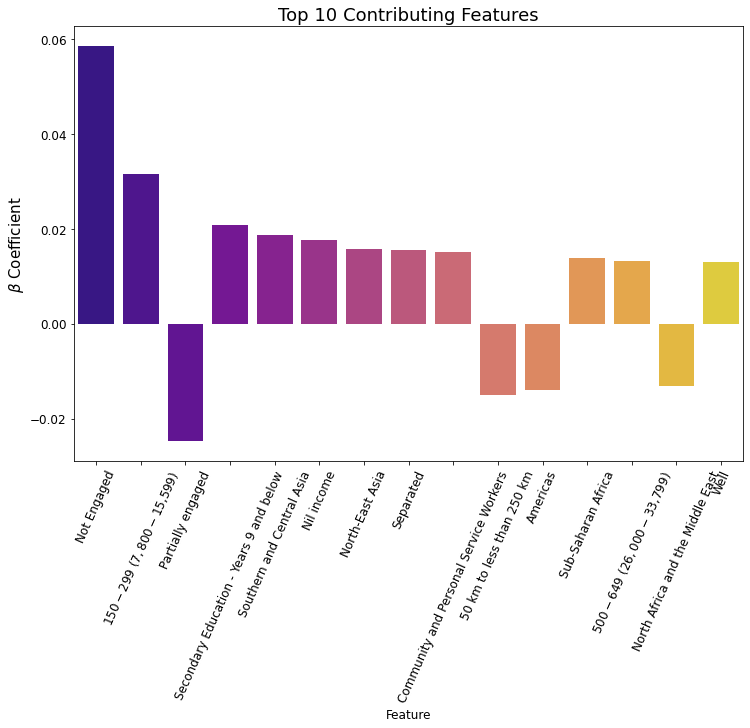

In [28]:

# create a figure of the top 10 features
fig = plt.figure(figsize=(12,8))

fig = sns.barplot(x='variable', y='coef', data=model_coefs.iloc[:15,:], palette='plasma')

for item in fig.get_xticklabels():
    item.set_rotation(66)
fig.tick_params(labelsize=12)
plt.title('Top 10 Contributing Features', fontsize=18)
plt.xlabel("Feature", fontsize=12)
plt.ylabel(r'$\beta$ Coefficient', fontsize=15)
#plt.savefig('fix_top_ten.png', bbox_inches='tight', pad_inches=0.2);

In [ ]:

Discussion notes:
Test R² value is reasonably high and inline with the training score, this suggests that the model is fitted well, i.e. neithing overfitting nor underfitting.
Model is explaining approx. 82% of the total variance in the test dataset.

In [22]:
# make predictions on the train set
train_preds = sgd_reg.predict(Xall_train)
# predictions on test data
y_hat = sgd_reg.predict(Xall_test)

## Calculation of the residuals
resid_train = y_train - train_preds
resid_test = y_test - y_hat

# Create DFs of the residuals with actuals and preds for ease of reference
df_resid_train = pd.DataFrame(data={'Actual': y_train, 'Prediction': train_preds, 'Resid': resid_train})
df_resid_test = pd.DataFrame(data={'Actual': y_test, 'Prediction': y_hat, 'Resid': resid_test})

# print out some performance statistics
print("Model Test performance statistics:")
print("----------------------------------")
print("Mean residual error \u03B5:   ", round(np.mean(resid_test),1),
      "(", round(np.mean(resid_test) / np.mean(df_clean['Unemployed, looking for full-time work'])*100,2),'% of the average house price )')
print("St Dev residual error \u03B5: ", round(np.std(resid_test),1))
print("RMSE:                    ", round(np.sqrt(mean_squared_error(y_test, y_hat)),2))
print("Explained VAR:           ", round(explained_variance_score(y_test, y_hat),3))

#plt.savefig('fix_resids.png', bbox_inches='tight', pad_inches=0.2);

Model Test performance statistics:
----------------------------------
Mean residual error ε:    0.0 ( 1.69 % of the average house price )
St Dev residual error ε:  1.0
RMSE:                     0.96
Explained VAR:            0.525


In [ ]:
Discussion notes:
Error distriubtion is fairly normal for the Train data, and approximating towards normal for Test data. 
The distributions are indicating some positive skew which is not ideal. Indicative of underlying relationships 
in the Feature data.
Scatter plots do indicate some underlying signal in the residuals, indicating that the underlying Features
contain some unfixed noise.

two potential sources;
remaining (multi)collinearity between feature variables; and
a level of heteroscadiscity. This may be a prime source of underlying issues as there does appear to be a
bias in the model for higher value properties. >>> This could be resolved by log-transforming the SalesPrice 
variable to remove any non-linearality.
The Train and Test R² values are very similar which suggests little variance in the model performance, and 
a good fit (no under/over fitting).

There does appear to be some bias in the model performance, particularly with higher value properties. This is 
likely due to an underlying non-linear relationship present in the SalesPrice - transforming this could improve 
overall performance.
The Explained Variance of the test model is similar to the R² value, which indicates that the underlying skew in
the residuals is not severe and a relatively low mean error term.
Do I trust this model?
Broadly speaking, yes.
It appears to work fairly well in predicting property vales with a mean residual error on the test data of around
2.5% the mean property value
the model variance appears good with minimal difference between Train/Test scores.
R² value is decent, indicating that the model is explaining ~82% of the variance.
Can the model be improved?
Definitely!
There is likely a non-linear relationship present between all/some of the Features with the SalePrice.
Transformations could resolve this issue.
additional multicollineararity likely still persists in the Feature set. A more strigent cut off on the 
correlations could be considered, or additional checks such as VIF could be employed to further improve the 
Feature data.